<a href="https://colab.research.google.com/github/fvillena/patrones/blob/main/3-dimensionality_reduction_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# t-distributed stochastic neighbor embedding

Sklearn en la clase sklearn.manifold.TSNE implementa este método y la forma de utilización es exactamente igual al PCA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.manifold # Módulo donde encontramos el método t-Distributed Stochastic Neighbor Embedding

In [2]:
mnist = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/mnist.csv")

Ajustamos un ebmedding de 2 dimensiones para visualización.

In [3]:
tsne_mnist_2d = sklearn.manifold.TSNE(2, perplexity=30.0, random_state=11)
mnist_2d_tsne=tsne_mnist_2d.fit_transform(mnist.iloc[:,:-1])
mnist_2d_tsne.shape

(1797, 2)

Este método agrupa de mucho mejor manera los números del conjunto de datos MNIST.

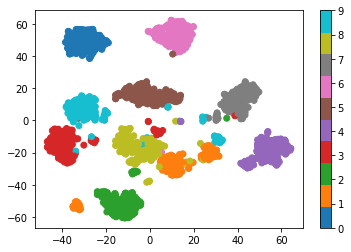

In [4]:
plt.scatter(
    mnist_2d_tsne[:,0],
    mnist_2d_tsne[:,1],
    c=mnist.label,
    cmap='tab10'
)
plt.colorbar()
plt.show()

## Actividad 1

Modifique el hiperparámetro `perplexity` de TSNE y visualice cómo cambian los resultados.

In [5]:
# Prográmame!

## Actividad 2

Realice la transformación de los datos a 2 dimensiones utilizando PCA y compare los resultados. ¿Cuál de los dos métodos funciona mejor?

In [6]:
# Prográmame!

# *Clustering*

El clustering o agrupamiento es la tarea de agrupar una serie de objetos de una manera que objetos del mismo grupo (cluster) son más similares entre sí que con los de otros grupos. Su objetivo principal es en la fase exploratoria de los datos y se clasifica dentro de los métodos no supervisados de aprendizaje de máquinas.



In [7]:
import sklearn.cluster # Algoritmos de clustering

In [8]:
blobs = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/blobs.csv") # Importamos un csv que contiene los datos a analizar.

In [9]:
blobs.head() # Verificamos qué podemos encontrar en el conjunto de datos.

,x,y
0,-4.503286,-5.138264
1,-4.352311,-3.476970
2,-5.234153,-5.234137
3,-3.420787,-4.232565
4,-5.469474,-4.457440


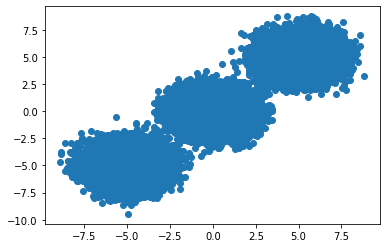

In [10]:
plt.scatter(blobs.x, blobs.y) # Exploramos la distribución que tienen nuestros datos

Intuitivamente podemos desprender que existe cierto agrupamiento de los datos. Uno de los algoritmos para realizar clustering es el k-means que se encuentra implementado en la clase `sklearn.cluster.KMeans`. Procederemos a realizar un agrupamiento utilizando este algoritmo.

In [11]:
km = sklearn.cluster.KMeans(n_clusters=2, random_state=11) # Instanciamos el algoritmo de k-means
km.fit(blobs) # Ajustamos el modelo de k-means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [12]:
km.labels_ # Grupos a los cuales asoció el modelo a cada una de las instancias del conjunto de datos

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

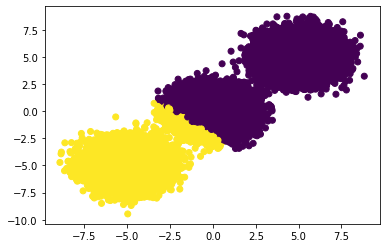

In [13]:
plt.scatter(blobs.x, blobs.y, c = km.labels_) # Verificamos gráficamente el agrupamiento

¿Qué pasó, es correcto el número de grupos utilizado en el modelo?. ¿Cómo podemos evaluar de una manera más sistemática el correcto número de grupos?.

Aquí puedes encontrar la documentación de la implementación de sklearn de k-means: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

## Actividad 3

Programa un ciclo para evaluar el mejor número de clusters y grafica los resultados. Recuerda el criterio que se mostro en clases para evaluar la calidad del clustering

In [14]:
# TODO: Programa un ciclo para evaluar el mejor número de clusters y grafica los resultados.

for n_clusters in range(5):
    pass

Importamos otro conjunto de datos y probamos el mismo algoritmo de agrupamiento que hicimos anteriormente.

In [15]:
moons = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/twomoons.csv")

In [16]:
moons.head()

,x,y
0,1.725508,-0.043207
1,-0.826517,0.559084
2,1.964777,0.217817
3,1.453529,-0.398344
4,0.030248,0.465012


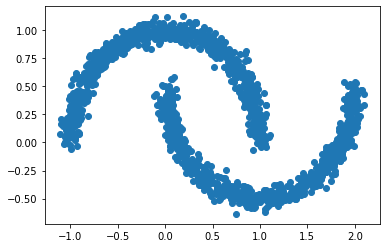

In [17]:
plt.scatter(moons.x, moons.y)

In [18]:
km = sklearn.cluster.KMeans(n_clusters=2, random_state=11)
km.fit(moons)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

In [19]:
km.labels_

array([1, 0, 1, ..., 0, 1, 1], dtype=int32)

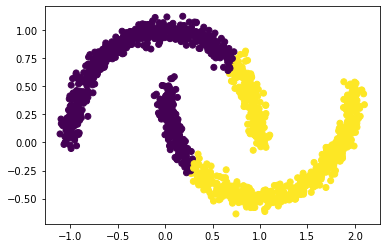

In [20]:
plt.scatter(moons.x, moons.y, c = km.labels_)

## Actividad 4

K-Means no funciona en este caso. Realiza un dendrograma de los datos y con este selecciona el número de clústers óptimo para el conjunto de datos.


In [21]:
# HINT: import seaborn as sns; sns.clustermap()
# Prográmame

## Actividad 5 (opcional): Datos de microarreglo
Implementa el algoritmo de agrupamiento más correcto para analizar los siguientes datos de microarreglo. Agrupa tanto por gen como por linea celular e interpreta los resultados.

In [22]:
microarray = pd.read_csv("https://raw.githubusercontent.com/fvillena/mlb/master/data/gene_expressions.tsv", sep="\t", index_col="gene")

In [23]:
microarray.head()

,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,EKVX,HCC-2998,HCT-116,HCT-15,HL-60,HOP-62,HOP-92,HS-578T,HT29,IGR-OV1,K-562,KM12,LOX-IMVI,M14,MALME-3M,MCF7,MDA-MB-231,MDA-MB-435,MDA-MB-468,MOLT-4,NCI-ADR-RES,NCI-H226,NCI-H23,NCI-H322M,NCI-H460,NCI-H522,OVCAR-3,OVCAR-4,OVCAR-5,OVCAR-8,PC-3,RPMI-8226,RXF-393,SF-268,SF-295,SF-539,SK-MEL-2,SK-MEL-28,SK-MEL-5,SK-OV-3,SN12C,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,0.094523,-0.795477,-0.915477,-0.955477,-0.625477,0.584523,1.394523,2.754523,-0.965477,0.604523,0.564523,-0.845477,-1.025477,0.684523,1.984523,1.594523,0.414523,1.154523,0.684523,1.644523,0.834523,0.124523,0.324523,1.414523,-0.005477,1.524523,0.914523,-0.035477,-1.015477,0.514523,-0.905477,-0.165477,1.014523,0.814523,1.424523,1.244523,1.554523,1.414523,1.114523,1.754523,2.074523,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,0.100677,-1.349323,-1.289323,-1.409323,-1.349323,-1.409323,-1.409323,-1.409323,-1.399323,-1.409323,-1.379323,-1.379323,-1.379323,2.260677,5.510677,-1.369323,-1.269323,-1.269323,2.380677,-1.399323,-1.399323,-0.379323,0.240677,-1.159323,-1.339323,-1.309323,-1.369323,-1.369323,-1.209323,-1.349323,-1.289323,-1.409323,-1.329323,-1.409323,-1.289323,0.250677,4.310677,6.570677,6.620677,-1.379323,-1.369323,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.586062,-1.616062,-1.696062,-1.696062,-1.696062,-1.696062,-1.686062,-1.696062,-1.696062,-1.686062,-1.686062,1.733938,-1.626062,-1.686062,-1.616062,-1.696062,-1.696062,-1.636062,-1.296062,-1.696062,-1.696062,-1.696062,-1.686062,0.023938,-1.696062,-1.696062,-1.446062,-1.556062,-1.446062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.686062,-1.546062,-1.506062,-1.546062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,1.498677,0.778677,0.968677,-1.591323,-2.241323,-0.081323,1.208677,-1.581323,0.278677,2.368677,-2.201323,-1.361323,-2.241323,-2.201323,0.258677,1.238677,1.508677,-2.241323,-0.241323,-2.241323,0.158677,-1.841323,0.498677,3.008677,0.238677,-0.561323,-0.721323,1.468677,0.168677,0.048677,-1.731323,-1.661323,2.668677,-1.131323,-1.081323,-0.511323,2.718677,0.778677,-2.241323,2.278677,-0.051323,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,1.038385,-0.441615,1.348385,-0.781615,0.858385,-0.401615,0.958385,-0.411615,-1.071615,0.308385,1.688385,-0.871615,0.488385,1.688385,1.118385,0.018385,-0.101615,0.858385,-0.711615,0.898385,1.168385,0.848385,1.088385,0.568385,0.818385,-0.241615,1.158385,0.848385,1.108385,1.118385,0.878385,1.328385,0.628385,1.018385,1.068385,0.178385,1.408385,0.868385,1.148385,1.488385,0.098385,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385


In [24]:
# TODO: Entrenamiento, ajuste y visualización de un modelo de clustering para microarreglo.